In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, \
    AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
X_train_data_path = os.getcwd() + '/data/' + "X_train.csv"
y_train_data_path = os.getcwd() + '/data/' + "y_train.csv"
X_test_data_path = os.getcwd() + '/data/' + "X_test.csv"

In [3]:
X = pd.read_csv(X_train_data_path, index_col='index')
y = pd.read_csv(y_train_data_path, index_col='index')
X_test = pd.read_csv(X_test_data_path, index_col='index')

In [4]:
X_train, X_test_from_train, y_train, y_test_from_train = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [5]:
X_datasets = [X_train, X_test_from_train, X_test]

In [6]:
# view all columns
pd.set_option('display.max_columns', None)

In [7]:
display(X_train)

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_last_12m,installment,int_rate,issue_d,loan_amnt,mort_acc,mths_since_last_delinq,mths_since_recent_bc_dlq,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1030569,0.0,MS,90000.0,0.0,0.0,4.0,23.23,Mar-2007,8 years,669.0,665.0,13850.0,MORTGAGE,NaN,502.45,18.25%,Jul-2015,13850.0,1.0,2.0,NaN,7.0,1.0,3.0,5.0,12.0,0.0,0.0,1.0,2.0,12.0,NaN,NaN,100.0,0.0,0.0,home_improvement,27.3%,0.0,36 months,Home improvement,17.0,Verified,386xx
965737,0.0,MD,95000.0,0.0,0.0,0.0,13.54,Apr-2006,6 years,704.0,700.0,21000.0,OWN,NaN,707.48,12.99%,Mar-2014,21000.0,0.0,NaN,NaN,2.0,0.0,3.0,10.0,9.0,0.0,0.0,0.0,1.0,9.0,NaN,NaN,33.3,0.0,0.0,debt_consolidation,60.3%,0.0,36 months,Debt consolidation,15.0,Source Verified,207xx
151079,0.0,IL,65000.0,0.0,0.0,0.0,16.06,Jul-1995,10+ years,669.0,665.0,12000.0,MORTGAGE,NaN,421.83,15.99%,Nov-2014,12000.0,5.0,81.0,NaN,6.0,0.0,2.0,15.0,12.0,0.0,0.0,0.0,4.0,12.0,NaN,NaN,50.0,3.0,2.0,debt_consolidation,51%,0.0,36 months,Debt consolidation,22.0,Source Verified,613xx
1037869,0.0,TX,89000.0,0.0,0.0,0.0,17.69,Feb-1992,10+ years,724.0,720.0,28000.0,MORTGAGE,NaN,570.16,8.18%,Aug-2015,28000.0,2.0,NaN,NaN,NaN,0.0,4.0,19.0,10.0,0.0,0.0,0.0,1.0,10.0,NaN,NaN,75.0,0.0,0.0,credit_card,72.4%,0.0,60 months,Credit card refinancing,24.0,Not Verified,764xx
159392,0.0,PA,65500.0,0.0,0.0,0.0,20.55,Oct-2000,10+ years,719.0,715.0,8400.0,MORTGAGE,0.0,252.97,5.32%,Feb-2017,8400.0,4.0,58.0,71.0,13.0,5.0,3.0,17.0,21.0,0.0,0.0,0.0,1.0,21.0,2.0,2.0,40.0,0.0,0.0,debt_consolidation,35%,0.0,36 months,Debt consolidation,41.0,Not Verified,170xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.0,CA,176000.0,0.0,0.0,1.0,8.26,Mar-2002,3 years,684.0,680.0,15000.0,MORTGAGE,NaN,466.53,7.49%,Jan-2015,15000.0,1.0,21.0,28.0,3.0,0.0,6.0,11.0,9.0,0.0,0.0,0.0,1.0,9.0,NaN,NaN,16.7,0.0,0.0,credit_card,59.7%,0.0,36 months,Credit card refinancing,17.0,Not Verified,902xx
259178,0.0,WA,190000.0,0.0,0.0,0.0,6.02,Aug-1999,10+ years,679.0,675.0,35000.0,RENT,NaN,1262.88,17.86%,Nov-2015,35000.0,1.0,NaN,NaN,1.0,0.0,4.0,8.0,5.0,0.0,0.0,0.0,1.0,5.0,NaN,NaN,100.0,0.0,0.0,debt_consolidation,98%,0.0,36 months,Debt consolidation,10.0,Source Verified,993xx
131932,0.0,NJ,25000.0,0.0,0.0,0.0,16.51,Apr-2003,1 year,684.0,680.0,7000.0,RENT,NaN,234.82,12.69%,Oct-2011,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,0.0,0.0,debt_consolidation,54.2%,0.0,36 months,Debt Consolidation,24.0,Not Verified,087xx


In [8]:
X_train.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959888 entries, 1030569 to 121958
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   acc_now_delinq              959888 non-null  float64
 1   addr_state                  959888 non-null  object 
 2   annual_inc                  959888 non-null  float64
 3   chargeoff_within_12_mths    959859 non-null  float64
 4   collections_12_mths_ex_med  959859 non-null  float64
 5   delinq_2yrs                 959888 non-null  float64
 6   dti                         959888 non-null  float64
 7   earliest_cr_line            959888 non-null  object 
 8   emp_length                  902451 non-null  object 
 9   fico_range_high             959888 non-null  float64
 10  fico_range_low              959888 non-null  float64
 11  funded_amnt                 959888 non-null  float64
 12  home_ownership              959888 non-null  object 
 13  inq_last

In [9]:
y_train.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959888 entries, 1030569 to 121958
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   loan_status  959888 non-null  int64
dtypes: int64(1)
memory usage: 14.6 MB


In [10]:
month_dict = {'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4', 'May': '5', 'Jun': '6',
                  'Jul': '7', 'Aug': '8', 'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

def transform_date_features(X_dataset, feature_name):
    feature_name_month = feature_name + '_month'
    feature_name_year = feature_name + '_year'
    # Split into months and years
    X_dataset[[feature_name_month, feature_name_year]] = X_dataset[feature_name].str.split('-', 1, expand=True)
    # Convert feature to numeric
    X_dataset[feature_name_year] = pd.to_numeric(X_dataset[feature_name_year])

    X_dataset[feature_name_month] = X_dataset[feature_name_month].map(month_dict)
    X_dataset[feature_name_month] = pd.to_numeric(X_dataset[feature_name_month])

    X_dataset.drop(feature_name, axis=1, inplace=True)

In [11]:
for X_dataset in X_datasets:
    transform_date_features(X_dataset, 'earliest_cr_line');
    transform_date_features(X_dataset, 'issue_d');

C:\Users\gusak\AppData\Local\Temp\ipykernel_7772\4252340021.py:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  X_dataset[[feature_name_month, feature_name_year]] = X_dataset[feature_name].str.split('-', 1, expand=True)
C:\Users\gusak\AppData\Local\Temp\ipykernel_7772\4252340021.py:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  X_dataset[[feature_name_month, feature_name_year]] = X_dataset[feature_name].str.split('-', 1, expand=True)
C:\Users\gusak\AppData\Local\Temp\ipykernel_7772\4252340021.py:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  X_dataset[[feature_name_month, feature_name_year]] = X_dataset[feature_name].str.split('-', 1, expand=True)
C:\Users\gusak\AppData\Local\Temp\ipykernel_7772\4252340021.py:8: Futu

In [12]:
display(X_train)

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_last_12m,installment,int_rate,loan_amnt,mort_acc,mths_since_last_delinq,mths_since_recent_bc_dlq,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1030569,0.0,MS,90000.0,0.0,0.0,4.0,23.23,8 years,669.0,665.0,13850.0,MORTGAGE,NaN,502.45,18.25%,13850.0,1.0,2.0,NaN,7.0,1.0,3.0,5.0,12.0,0.0,0.0,1.0,2.0,12.0,NaN,NaN,100.0,0.0,0.0,home_improvement,27.3%,0.0,36 months,Home improvement,17.0,Verified,386xx,3,2007,7,2015
965737,0.0,MD,95000.0,0.0,0.0,0.0,13.54,6 years,704.0,700.0,21000.0,OWN,NaN,707.48,12.99%,21000.0,0.0,NaN,NaN,2.0,0.0,3.0,10.0,9.0,0.0,0.0,0.0,1.0,9.0,NaN,NaN,33.3,0.0,0.0,debt_consolidation,60.3%,0.0,36 months,Debt consolidation,15.0,Source Verified,207xx,4,2006,3,2014
151079,0.0,IL,65000.0,0.0,0.0,0.0,16.06,10+ years,669.0,665.0,12000.0,MORTGAGE,NaN,421.83,15.99%,12000.0,5.0,81.0,NaN,6.0,0.0,2.0,15.0,12.0,0.0,0.0,0.0,4.0,12.0,NaN,NaN,50.0,3.0,2.0,debt_consolidation,51%,0.0,36 months,Debt consolidation,22.0,Source Verified,613xx,7,1995,11,2014
1037869,0.0,TX,89000.0,0.0,0.0,0.0,17.69,10+ years,724.0,720.0,28000.0,MORTGAGE,NaN,570.16,8.18%,28000.0,2.0,NaN,NaN,NaN,0.0,4.0,19.0,10.0,0.0,0.0,0.0,1.0,10.0,NaN,NaN,75.0,0.0,0.0,credit_card,72.4%,0.0,60 months,Credit card refinancing,24.0,Not Verified,764xx,2,1992,8,2015
159392,0.0,PA,65500.0,0.0,0.0,0.0,20.55,10+ years,719.0,715.0,8400.0,MORTGAGE,0.0,252.97,5.32%,8400.0,4.0,58.0,71.0,13.0,5.0,3.0,17.0,21.0,0.0,0.0,0.0,1.0,21.0,2.0,2.0,40.0,0.0,0.0,debt_consolidation,35%,0.0,36 months,Debt consolidation,41.0,Not Verified,170xx,10,2000,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.0,CA,176000.0,0.0,0.0,1.0,8.26,3 years,684.0,680.0,15000.0,MORTGAGE,NaN,466.53,7.49%,15000.0,1.0,21.0,28.0,3.0,0.0,6.0,11.0,9.0,0.0,0.0,0.0,1.0,9.0,NaN,NaN,16.7,0.0,0.0,credit_card,59.7%,0.0,36 months,Credit card refinancing,17.0,Not Verified,902xx,3,2002,1,2015
259178,0.0,WA,190000.0,0.0,0.0,0.0,6.02,10+ years,679.0,675.0,35000.0,RENT,NaN,1262.88,17.86%,35000.0,1.0,NaN,NaN,1.0,0.0,4.0,8.0,5.0,0.0,0.0,0.0,1.0,5.0,NaN,NaN,100.0,0.0,0.0,debt_consolidation,98%,0.0,36 months,Debt consolidation,10.0,Source Verified,993xx,8,1999,11,2015
131932,0.0,NJ,25000.0,0.0,0.0,0.0,16.51,1 year,684.0,680.0,7000.0,RENT,NaN,234.82,12.69%,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,0.0,0.0,debt_consolidation,54.2%,0.0,36 months,Debt Consolidation,24.0,Not Verified,087xx,4,2003,10,2011


In [13]:
# Delete 'months' from the 'term' column
for X_dataset in X_datasets:
    X_dataset['term'] = X_dataset['term'].str.replace(' months', '')

In [14]:
# Change int_rate and revol_util columns type to float
for X_dataset in X_datasets:
    X_dataset['int_rate'] = X_dataset['int_rate'].str.rstrip('%').astype(float) / 100.0
    X_dataset['revol_util'] = X_dataset['revol_util'].str.rstrip('%').astype(float) / 100.0

In [15]:
display(X_test)

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,fico_range_high,fico_range_low,funded_amnt,home_ownership,inq_last_12m,installment,int_rate,loan_amnt,mort_acc,mths_since_last_delinq,mths_since_recent_bc_dlq,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_rev_accts,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_il_24m,open_rv_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,GA,46209.0,0.0,0.0,0.0,34.98,8 years,669.0,665.0,15700.0,MORTGAGE,6.0,437.65,0.2245,15700.0,3.0,48.0,48.0,2.0,1.0,4.0,9.0,11.0,0.0,0.0,0.0,4.0,11.0,3.0,3.0,75.0,0.0,0.0,debt_consolidation,0.617,0.0,60,Debt consolidation,20.0,Verified,302xx,4,2009,1,2016
1,0.0,PA,43500.0,0.0,0.0,0.0,20.25,5 years,704.0,700.0,7200.0,OWN,NaN,166.79,0.1380,7200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,0.0,0.0,debt_consolidation,0.586,0.0,60,POFF,32.0,Not Verified,151xx,6,1982,4,2011
2,0.0,OH,72000.0,0.0,0.0,0.0,15.98,3 years,699.0,695.0,24000.0,MORTGAGE,NaN,847.21,0.1629,24000.0,2.0,63.0,63.0,2.0,5.0,3.0,23.0,18.0,0.0,0.0,0.0,1.0,18.0,NaN,NaN,40.0,0.0,0.0,credit_card,0.462,0.0,36,credit crd,36.0,Verified,440xx,11,1997,11,2012
3,0.0,LA,120000.0,0.0,0.0,0.0,24.93,10+ years,784.0,780.0,7800.0,MORTGAGE,1.0,234.90,0.0532,7800.0,2.0,68.0,NaN,2.0,0.0,9.0,16.0,21.0,0.0,0.0,0.0,5.0,21.0,2.0,6.0,0.0,0.0,0.0,other,0.037,0.0,36,Other,31.0,Not Verified,710xx,7,2001,6,2017
4,0.0,IN,55000.0,0.0,0.0,1.0,23.22,10+ years,689.0,685.0,10500.0,MORTGAGE,4.0,331.90,0.0859,10500.0,7.0,21.0,NaN,1.0,0.0,4.0,9.0,15.0,0.0,0.0,0.0,1.0,15.0,3.0,0.0,50.0,0.0,0.0,credit_card,0.681,0.0,36,Credit card refinancing,28.0,Not Verified,465xx,9,1990,9,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590972,0.0,CA,39000.0,0.0,0.0,1.0,26.77,3 years,694.0,690.0,10000.0,RENT,NaN,318.79,0.0917,10000.0,0.0,22.0,NaN,0.0,0.0,4.0,7.0,14.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN,50.0,0.0,0.0,credit_card,0.687,0.0,36,Credit card refinancing,20.0,Source Verified,916xx,10,2007,8,2015
590973,0.0,IL,80000.0,0.0,0.0,1.0,22.54,10+ years,674.0,670.0,18000.0,MORTGAGE,NaN,615.11,0.1399,18000.0,0.0,17.0,NaN,8.0,0.0,5.0,28.0,24.0,0.0,0.0,0.0,11.0,24.0,NaN,NaN,16.7,0.0,0.0,debt_consolidation,0.545,0.0,36,Debt consolidation,37.0,Verified,601xx,11,1991,7,2015
590974,0.0,OH,42000.0,0.0,0.0,0.0,21.60,10+ years,709.0,705.0,18000.0,MORTGAGE,NaN,424.92,0.1465,18000.0,3.0,60.0,67.0,16.0,0.0,2.0,14.0,10.0,0.0,0.0,0.0,1.0,10.0,NaN,NaN,100.0,0.0,0.0,debt_consolidation,0.677,0.0,60,Debt consolidation,22.0,Source Verified,431xx,2,1976,4,2015


In [16]:
# Convert the 'emp_length' values to float
for X_dataset in X_datasets:
    X_dataset['emp_length'] = X_dataset['emp_length'].str.extract('(\d+)').astype('float')

In [17]:
# choose categorical and continuous features from data
categorical_columns = [
    c for c in X_train.columns if X_train[c].dtype.name == "object"
]

numerical_columns = [
    c for c in X_train.columns if X_train[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['addr_state', 'home_ownership', 'purpose', 'term', 'title', 'verification_status', 'zip_code']
numerical_columns: ['acc_now_delinq', 'annual_inc', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'inq_last_12m', 'installment', 'int_rate', 'loan_amnt', 'mort_acc', 'mths_since_last_delinq', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_rev_accts', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_il_24m', 'open_rv_24m', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'revol_util', 'tax_liens', 'total_acc', 'earliest_cr_line_month', 'earliest_cr_line_year', 'issue_d_month', 'issue_d_year']


In [18]:
for X_dataset in X_datasets:
    X_dataset["collections_12_mths_ex_med"].fillna(X_dataset["chargeoff_within_12_mths"].mode(), inplace=True)
    X_dataset["chargeoff_within_12_mths"].fillna(X_dataset["chargeoff_within_12_mths"].mode(), inplace=True)

    for c in numerical_columns:
        X_dataset[c].fillna(X_dataset[c].mean(), inplace=True)

In [19]:
# get columns with nans
for X_dataset in X_datasets:
    columns_with_nan = X_dataset.columns[X_dataset.isnull().any()]
    nan_count = X_dataset[columns_with_nan].isnull().sum()
    nan_name_count = dict(zip(columns_with_nan, nan_count))
    print("columns_with_nan:", nan_name_count)

columns_with_nan: {'title': 10978, 'zip_code': 1}
columns_with_nan: {'title': 2822}
columns_with_nan: {'title': 6844}


In [20]:
X_train['title'].value_counts(dropna=False, ascending=False)

Debt consolidation         482207
Credit card refinancing    190132
Home improvement            56351
Other                       52509
Major purchase              18561
                            ...  
Balance Setter                  1
Summer Expenses                 1
Soxfan                          1
My business loan                1
air condition unit              1
Name: title, Length: 36201, dtype: int64

In [21]:
# drop title feature
for X_dataset in X_datasets:
    X_dataset = X_dataset.drop('title', axis=1)

# delete from list
categorical_columns.remove('title')

In [22]:
# fill missing data
for X_dataset in X_datasets:
    X_dataset['zip_code'].fillna(X_dataset['zip_code'].mode()[0], inplace=True)

In [23]:
def count_values(features, data):
    result = {}

    for feature in features:
        result[feature] = len(set(data[feature]))

    return result

In [24]:
for X_dataset in X_datasets:
    result = count_values(categorical_columns, X_train)
    print(result)

{'addr_state': 51, 'home_ownership': 6, 'purpose': 14, 'term': 2, 'verification_status': 3, 'zip_code': 927}
{'addr_state': 51, 'home_ownership': 6, 'purpose': 14, 'term': 2, 'verification_status': 3, 'zip_code': 927}
{'addr_state': 51, 'home_ownership': 6, 'purpose': 14, 'term': 2, 'verification_status': 3, 'zip_code': 927}


In [25]:
# drop zip_code feature
for X_dataset in X_datasets:
    X_dataset = X_dataset.drop('zip_code', axis=1)

# delete from list
categorical_columns.remove('zip_code')

In [26]:
# drop addr_state feature
for X_dataset in X_datasets:
    X_dataset = X_dataset.drop('addr_state', axis=1)

# delete from list
categorical_columns.remove('addr_state')

In [27]:
result = count_values(categorical_columns, X_train)
print(result)

{'home_ownership': 6, 'purpose': 14, 'term': 2, 'verification_status': 3}


In [28]:
onehot_encoder = OneHotEncoder(sparse_output=False)

In [29]:
def use_onehot_encoder_on_dataset(X_dataset):
    encoded_categorical_matrix = onehot_encoder.fit_transform(X_dataset[categorical_columns])
    # get the column names
    column_names = onehot_encoder.get_feature_names_out()
    encoded_categorical_dataset = pd.DataFrame(encoded_categorical_matrix, columns=column_names)

    encoded_categorical_dataset.index = X_dataset[numerical_columns].index
    # add numerical columns
    encoded_dataset = pd.concat([encoded_categorical_dataset, X_dataset[numerical_columns]], axis=1)

    return encoded_dataset

In [30]:
encoded_X_train = use_onehot_encoder_on_dataset(X_train)
encoded_X_test_from_train = use_onehot_encoder_on_dataset(X_test_from_train)
encoded_X_test = use_onehot_encoder_on_dataset(X_test)

In [31]:
encoded_categorical_X_datasets = [encoded_X_train, encoded_X_test_from_train, encoded_X_test]

In [32]:
X_y_train = pd.concat([X_train, y_train], axis=1)

In [33]:
%%time

# Modeling differents algorithms
random_state = 2

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)

classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(seed=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())

CPU times: total: 0 ns
Wall time: 999 µs


In [34]:
%%time
cv_results = []
for index, classifier in enumerate(classifiers):
    cv_results.append(cross_val_score(classifier, encoded_X_train, y = y_train.values.ravel(), scoring = "roc_auc", cv = kfold, n_jobs=-1, verbose=3))
    print(f"Progress: {index + 1}/{len(classifiers)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


Progress: 1/6


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Progress: 2/6


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  8.7min finished


Progress: 3/6


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  6.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Progress: 4/6


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 35.8min finished


Progress: 5/6


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.7s finished


Progress: 6/6
CPU times: total: 5.09 s
Wall time: 54min 24s


In [35]:
%%time
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

CPU times: total: 0 ns
Wall time: 102 ms


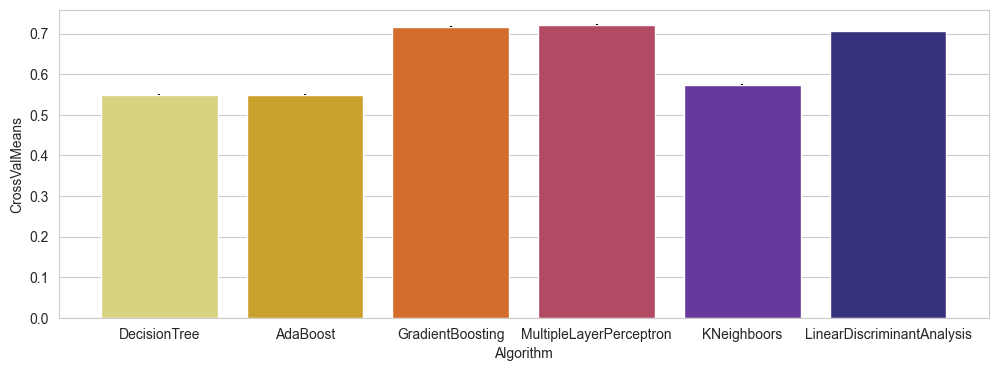

In [79]:
cv_res = pd.DataFrame(
    {"CrossValMeans": cv_means, "CrossValerrors": cv_std, "Algorithm": ["DecisionTree","AdaBoost","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LinearDiscriminantAnalysis"]})

plt.figure(figsize=(12, 4))
ax = sns.barplot(x='Algorithm', y='CrossValMeans', data=cv_res, palette='CMRmap_r')
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=cv_res["CrossValerrors"], fmt="none", c="k")
plt.show()

DecisionTreeClassifier -> 0.549, 0.550, 0.551\
AdaBoostClassifier -> 0.548, 0.551, 0.550\
GradientBoostingClassifier -> 0.717, 0.718, 0.717\
XGBClassifier -> 0.722, 0.724, 0.722\
KNeighborsClassifier -> 0.574, 0.574, 0.574\
LogisticRegression -> STOP: TOTAL NO. of ITERATIONS REACHED LIMIT\
LinearDiscriminantAnalysis -> 0.706, 0.707, 0.706\

In [37]:
scaler = StandardScaler()
encoded_X_train_scaled = scaler.fit_transform(encoded_X_train)
encoded_X_test_from_train_scaled = scaler.fit_transform(encoded_X_test_from_train)

In [38]:
logreg = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=200)
cross_val_score(logreg, encoded_X_train_scaled, y=y_train.values.ravel(), scoring="roc_auc", cv=kfold, n_jobs=-1, verbose=3, error_score='raise')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.7s finished


array([0.70788971, 0.70754346, 0.70639105])

LogisticRegression -> 0.707, 0.707, 0.706

In [39]:
# best params from older notebooks

# XGBClassifier best_params = (seed=17, max_depth=8, n_estimators=200, learning_rate=0.1, n_jobs=4)
# GradientBoostingClassifier -> (random_state=random_state, n_estimators=200, learning_rate=0.5, max_depth=4, min_samples_leaf=100,max_features=0.3)
# RandomForestClassifier best_params = (n_jobs=-1, max_depth=10, max_features=25, n_estimators=100)
# LogisticRegression -> (random_state=random_state, solver='lbfgs', max_iter=200)
# LinearDiscriminantAnalysis -> to be found

In [40]:
%%time
LGBMC_best = LGBMClassifier(colsample_bytree=0.8, max_depth=6, min_child_samples=10, n_estimators=300, random_state=random_state, subsample=0.7)
LGBMC_best.fit(encoded_X_train, y_train.values.ravel())

CPU times: total: 1min 1s
Wall time: 18.2 s


LGBMClassifier(colsample_bytree=0.8, max_depth=6, min_child_samples=10,
               n_estimators=300, random_state=2, subsample=0.7)

In [41]:
%%time
xgb_best = XGBClassifier(seed=random_state, max_depth=8, n_estimators=200, learning_rate=0.1)
xgb_best.fit(encoded_X_train, y_train.values.ravel())

CPU times: total: 24min 58s
Wall time: 6min 35s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
%%time
rf_best = RandomForestClassifier(n_jobs=-1, max_depth=10, max_features=25, n_estimators=100)
rf_best = rf_best.fit(encoded_X_train, y_train.values.ravel())

CPU times: total: 21min 51s
Wall time: 5min 39s


In [43]:
%%time
logreg_best = LogisticRegression(random_state=random_state, solver='lbfgs', max_iter=200)
logreg_best = logreg_best.fit(encoded_X_train_scaled, y_train.values.ravel())

CPU times: total: 30.5 s
Wall time: 11.7 s


In [44]:
%%time
GBC_best = GradientBoostingClassifier(random_state=random_state, n_estimators=200, learning_rate=0.5, max_depth=4, min_samples_leaf=100,max_features=0.3)
GBC_best = GBC_best.fit(encoded_X_train, y_train.values.ravel())

CPU times: total: 7min 56s
Wall time: 7min 58s


In [45]:
%%time
lda_best = LinearDiscriminantAnalysis()
lda_best = lda_best.fit(encoded_X_train, y_train.values.ravel())

CPU times: total: 39.9 s
Wall time: 17.8 s


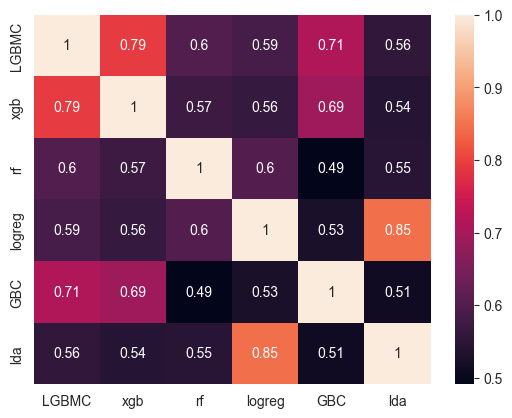

In [46]:
test_LGBMC = pd.Series(LGBMC_best.predict(encoded_X_test_from_train), name="LGBMC")
test_xgb = pd.Series(xgb_best.predict(encoded_X_test_from_train), name="xgb")
test_rf = pd.Series(rf_best.predict(encoded_X_test_from_train), name="rf")
test_logreg = pd.Series(logreg_best.predict(encoded_X_test_from_train_scaled), name="logreg")
test_GBC = pd.Series(GBC_best.predict(encoded_X_test_from_train), name="GBC")
test_lda = pd.Series(lda_best.predict(encoded_X_test_from_train), name="lda")

# Concatenate all classifier results
ensemble_results = pd.concat([test_LGBMC,test_xgb,test_rf,test_logreg, test_GBC, test_lda],axis=1)

g = sns.heatmap(ensemble_results.corr(),annot=True)

In [47]:
%%time
votingC_boost = VotingClassifier(
    estimators=[
        ('lgbmc', LGBMC_best), 
        ('xgb', xgb_best),
    ],
    voting='soft', n_jobs=4, verbose=3)

votingC_boost = votingC_boost.fit(encoded_X_train, y_train.values.ravel())

CPU times: total: 4.33 s
Wall time: 18min 39s


In [48]:
roc_auc_score_test_value_ensemble_model_boost = roc_auc_score(y_test_from_train, votingC_boost.predict_proba(encoded_X_test_from_train)[:, 1])
print(roc_auc_score_test_value_ensemble_model_boost)

0.7268470083244738


In [49]:
index = encoded_X_test.index
y_test = votingC_boost.predict_proba(encoded_X_test)[:, 1]
predictions = pd.DataFrame(y_test, index=index, columns=['loan_status'])

In [50]:
predictions.head()

,loan_status
index,
0,0.600087
1,0.251976
2,0.144663
3,0.037093
4,0.072169


In [51]:
predictions.to_csv('answer.csv')
# gini = 0.4585